# Execute the code below

In [ ]:
import pandas as pd
import seaborn as sns

url = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/spotify.zip"
df_music = pd.read_csv(url)
df_zoom = df_music.loc[df_music.genre.isin(['Country', 'Classical']), ['genre', 'duration_ms', 'speechiness']].reset_index(drop = True)
df_zoom

,genre,duration_ms,speechiness
0,Country,200013,0.0444
1,Country,208187,0.0569
2,Country,123360,0.0960
3,Country,238600,0.0368
4,Country,243000,0.0330
...,...,...,...
17915,Country,179147,0.0322
17916,Country,230400,0.0832
17917,Country,216093,0.0268
17918,Country,179947,0.0909


# Standardization and classification

You now have a dataset with Country and Classical musics, and 2 numerical features : duration and speechiness.
Our goal will be to predict genre from numerical features.

## Draw a scatterplot from df_zoom with
- 'duration_ms' on X axis
- 'speechiness' on Y axis
- 'genre' in hue

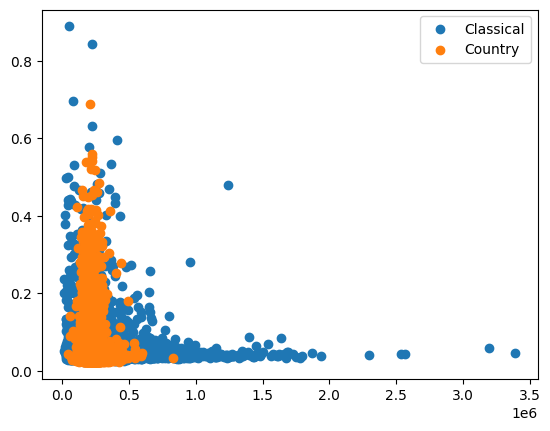

In [ ]:
import matplotlib.pyplot as plt

groups = df_zoom.groupby('genre')
for name, group in groups:
  plt.scatter(group.duration_ms, group.speechiness, label=name)
plt.legend()
plt.show()

## Classification
From df_zoom :
- define X (`duration_ms` and `speechiness`)
- define y (`genre`)
- split your datas into train and test datasets, and `random_state = 2`
- perform 3 classification algorithms (Logistic Regression, KNN and Decision Tree)
- score your 3 models with accuracy score on the train dataset and on the test dataset


In [ ]:
from sklearn.model_selection import train_test_split

X = df_zoom[['duration_ms', 'speechiness']]
y = df_zoom['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.25)

### Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def run_logistic_reg(X_train, X_test, y_train, y_test):
  logistic_model = LogisticRegression()
  logistic_model.fit(X_train, y_train)

  print(f'Logistic regression accuracy on train set {accuracy_score(y_train, logistic_model.predict(X_train))}')
  print(f'Logistic regression accuracy on test set {accuracy_score(y_test, logistic_model.predict(X_test))}')

run_logistic_reg(X_train, X_test, y_train, y_test)

Logistic regression accuracy on train set 0.51875
Logistic regression accuracy on test set 0.5098214285714285


### KNN classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def run_knn_reg(X_train, X_test, y_train, y_test):
  knn_model = KNeighborsClassifier()
  knn_model.fit(X_train, y_train)

  print(f'KNN classifier accuracy on train set {accuracy_score(y_train, knn_model.predict(X_train))}')
  print(f'KNN classifier accuracy on test set {accuracy_score(y_test, knn_model.predict(X_test))}')

run_knn_reg(X_train, X_test, y_train, y_test)

KNN classifier accuracy on train set 0.7979910714285714
KNN classifier accuracy on test set 0.7129464285714285


Desicion Tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def run_tree_reg(X_train, X_test, y_train, y_test):
  tree_model = DecisionTreeClassifier()
  tree_model.fit(X_train, y_train)

  print(f'Decision tree classifier accuracy on train set {accuracy_score(y_train, tree_model.predict(X_train))}')
  print(f'Decision tree classifier accuracy on test set {accuracy_score(y_test, tree_model.predict(X_test))}')

run_tree_reg(X_train, X_test, y_train, y_test)

Decision tree classifier accuracy on train set 0.9997767857142857
Decision tree classifier accuracy on test set 0.7375



You have to find these accuracy scores for test set :
- Logistic regression : 0.50982
- KNN : 0.71295
- Decision tree : 0.73728

It seems Decision tree is better, but did you look at the overfitting ?

Of course there is overfitting! It is the main characterisitc of tree alg. And as I do not specify the level on which tree needs to stop (do not want to mess with accuracy scores and spook the reviewers), it is as deep as possible

## Standardization

- Fit your scaler model on X_train
- Transform X_train and X_test  with your scaler model into  X_train_scaled and X_test_scaled
- perform and score the same 3 classification algorithms, but with X_train_scaled and X_test_scaled

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
run_logistic_reg(X_train_scaled, X_test_scaled, y_train, y_test)

Logistic regression accuracy on train set 0.6578125
Logistic regression accuracy on test set 0.6694196428571428


In [ ]:
run_knn_reg(X_train_scaled, X_test_scaled, y_train, y_test)

KNN classifier accuracy on train set 0.8364583333333333
KNN classifier accuracy on test set 0.7796875


In [ ]:
run_tree_reg(X_train_scaled, X_test_scaled, y_train, y_test)

Decision tree classifier accuracy on train set 0.9997767857142857
Decision tree classifier accuracy on test set 0.7294642857142857


# Conclusion
- Decision tree is insensitive to Standardization.
- Logistic regression and KNN have better result after Standardization.


We can remember that standardization is always good in preprocessing, before machine learning classifications and regressions. At worst, it does not change anything. At best, it improves results.